# Departamento de Marketing - Clustering

# # Dados: https://www.kaggle.com/arjunbhasin2013/ccdata

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
credicard_df = pd.read_csv('marketing_data.csv', sep=",", encoding ="utf-8")

In [3]:
credicard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credicard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
credicard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
credicard_df[credicard_df['ONEOFF_PURCHASES'] == 40761.25000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
credicard_df['CASH_ADVANCE'].max()

47137.21176

In [8]:
credicard_df[credicard_df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


ANÁLISE EXPLORATÓRIA DOS DADOS

<AxesSubplot:>

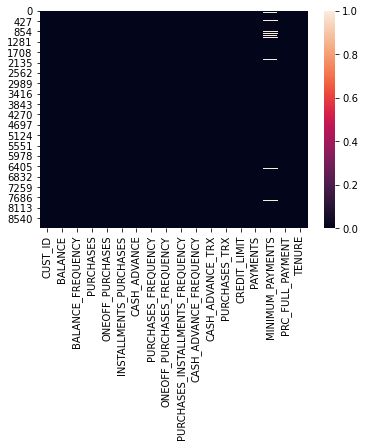

In [9]:
sns.heatmap(credicard_df.isnull())

In [10]:
credicard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
credicard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050816

In [12]:
credicard_df.loc[(credicard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = credicard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
credicard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [14]:
credicard_df.loc[(credicard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = credicard_df['CREDIT_LIMIT'].mean()

In [15]:
credicard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

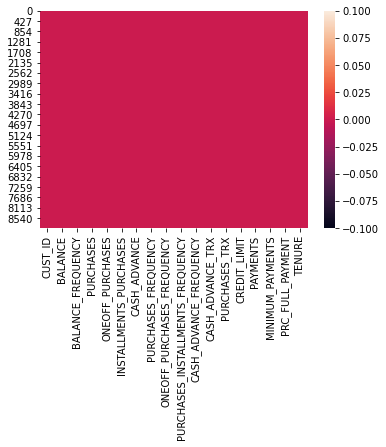

In [16]:
sns.heatmap(credicard_df.isnull());

In [17]:
credicard_df.duplicated().sum()

0

In [18]:
credicard_df.drop('CUST_ID', axis = 1, inplace = True)

In [19]:
credicard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [20]:
credicard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [21]:
len(credicard_df.columns)

17

C:\Users\bastosifb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bastosifb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bastosifb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

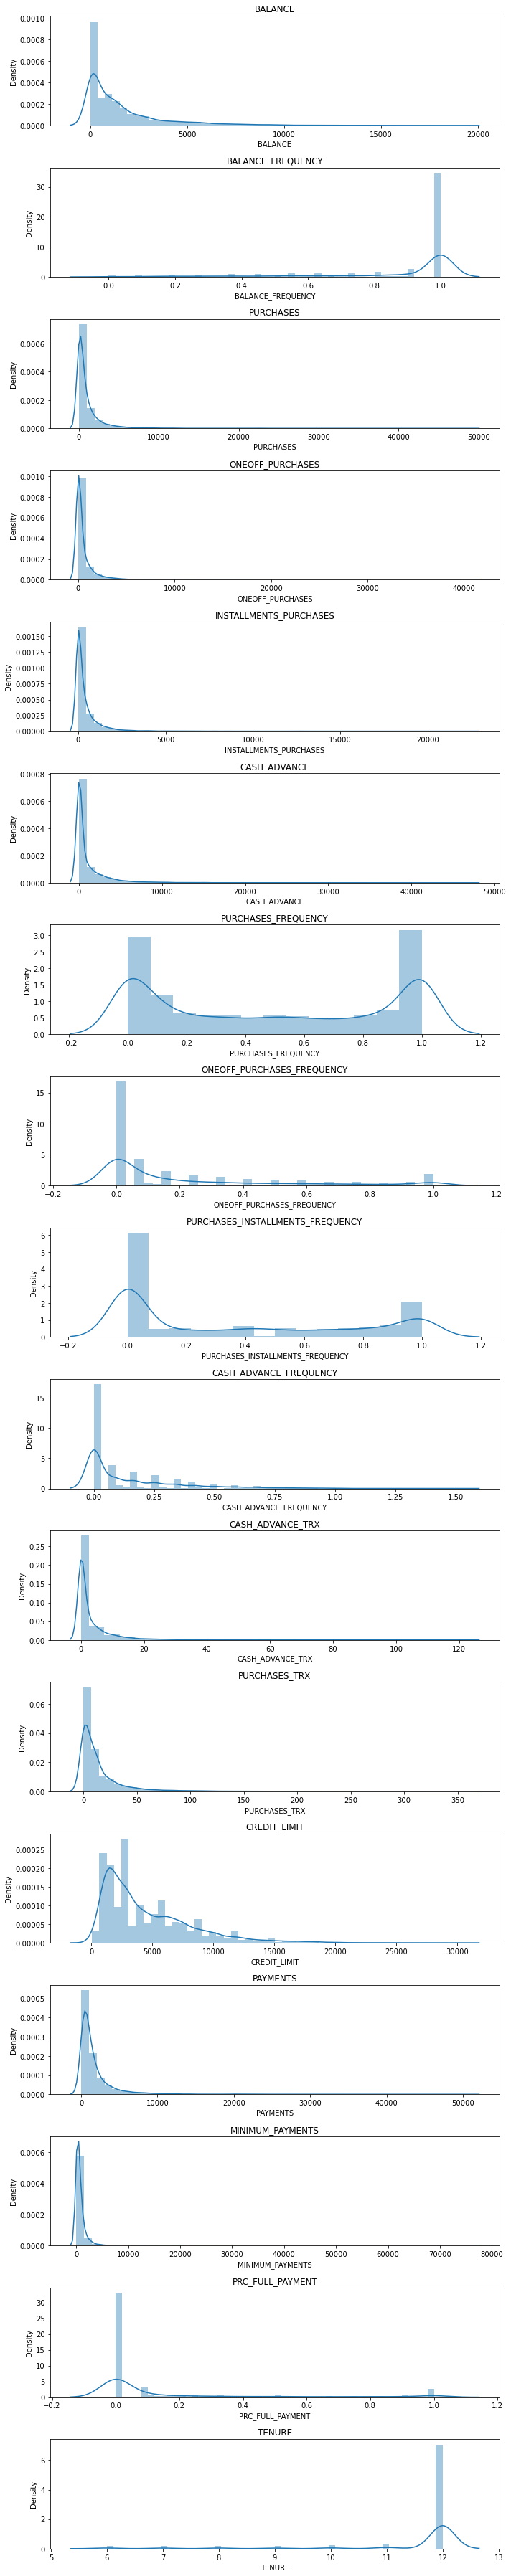

In [22]:
plt.figure(figsize=(10,50))
for i in range(len(credicard_df.columns)):
  plt.subplot(17, 1, i + 1)
  sns.distplot(credicard_df[credicard_df.columns[i]], kde = True)
  plt.title(credicard_df.columns[i])
plt.tight_layout();

In [23]:
correlations = credicard_df.corr()

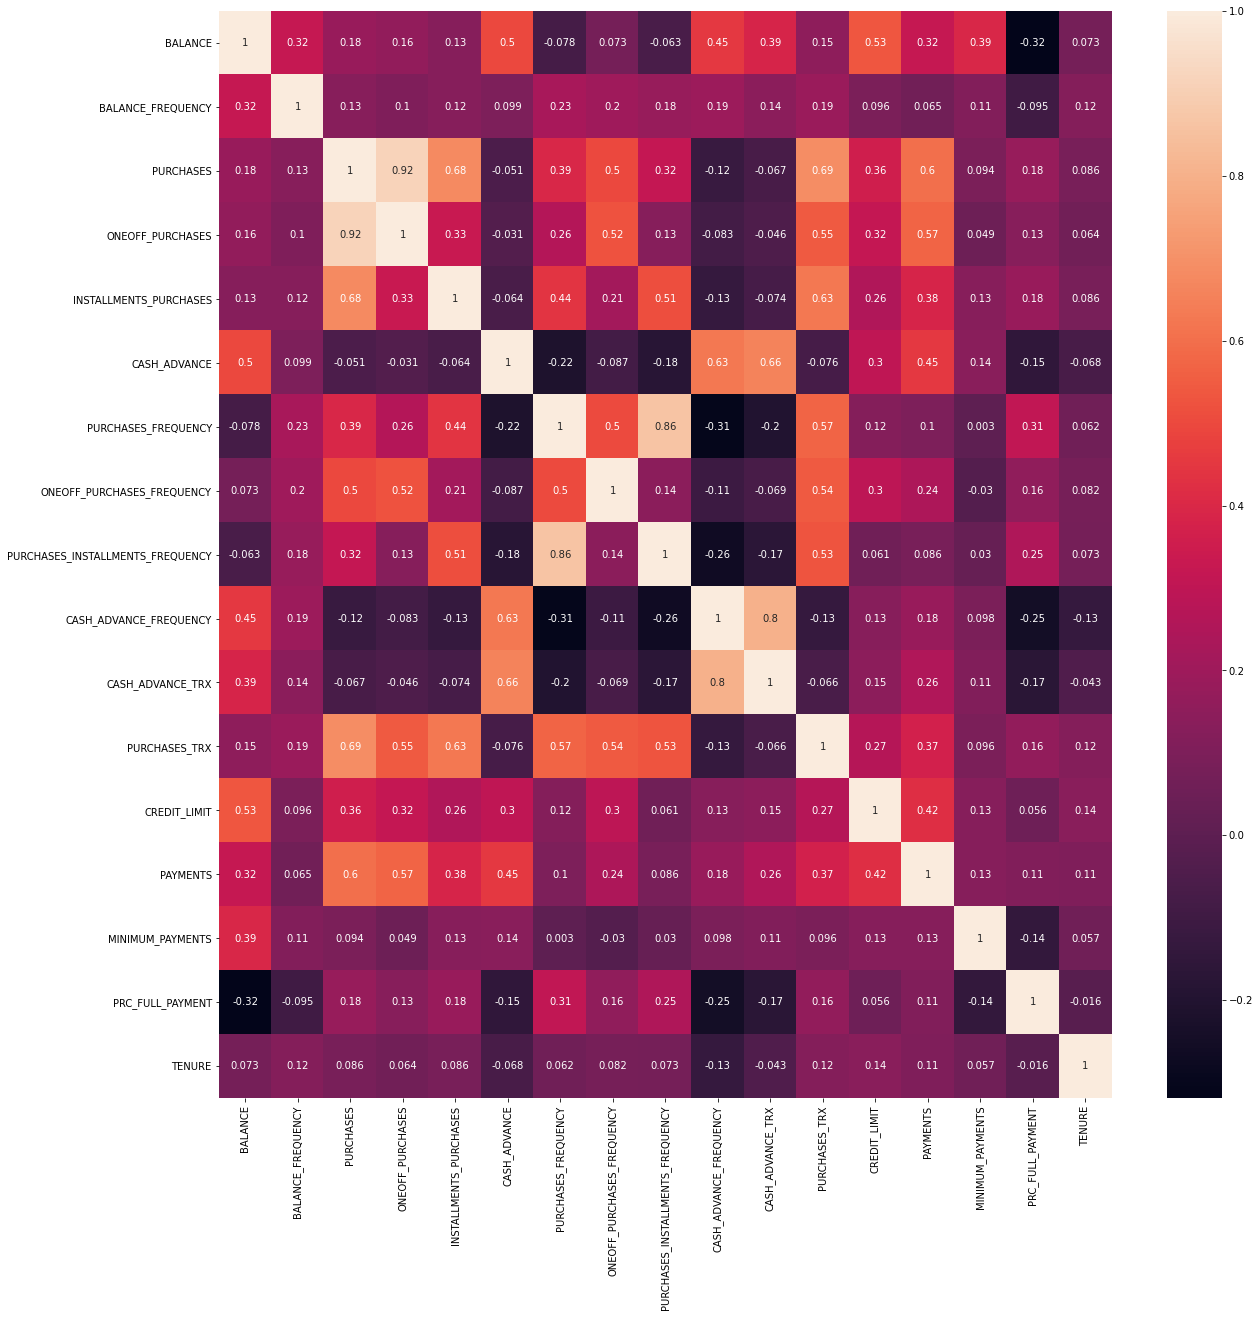

In [24]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

Aplicação do método de Elbow para definir a quantidade de cluster 

In [25]:
min(credicard_df['BALANCE']), max(credicard_df['BALANCE'])

(0.0, 19043.13856)

In [26]:
scaler = StandardScaler()
credicard_df_scaled = scaler.fit_transform(credicard_df)

In [27]:
type(credicard_df_scaled), type(credicard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [28]:
min(credicard_df_scaled[0]),max(credicard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [29]:
credicard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [30]:
wcss_1 = []
range_values = range(1,20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(credicard_df_scaled)
    wcss_1.append(kmeans.inertia_)


In [31]:
print(wcss_1)

[152149.99999999878, 127784.85236709229, 111986.74955130983, 99073.93763633838, 91503.05731858737, 84851.13240432613, 79660.40020496503, 74509.47852500639, 69979.07358739796, 66461.97885788149, 63617.16501733754, 61384.51760317501, 59144.71118546034, 57499.2502270193, 55885.17395427289, 54288.10148973976, 53282.54153642858, 52185.22156183134, 50901.1835571454]


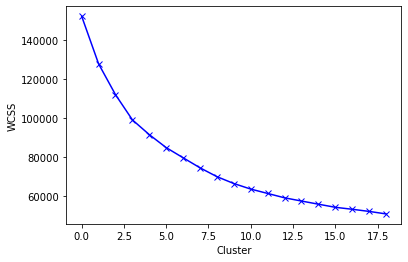

In [32]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Cluster')
plt.ylabel('WCSS');

Agrupamento com k-means

In [33]:
kmeans =KMeans(n_clusters=8)
kmeans.fit(credicard_df_scaled)
labels = kmeans.labels_

In [34]:
labels, len(labels)

(array([6, 2, 5, ..., 0, 0, 0]), 8950)

In [35]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 625, 2016,  884,  330, 1184, 1122, 2766,   23], dtype=int64))

In [36]:
kmeans.cluster_centers_

array([[-3.34234674e-01, -3.45364089e-01, -2.87006761e-01,
        -2.12743923e-01, -2.87412119e-01,  6.81714992e-02,
        -2.02319793e-01, -2.83605417e-01, -2.26362940e-01,
         3.08381932e-01,  3.47756747e-04, -3.87485175e-01,
        -5.62890609e-01, -3.91355369e-01, -2.09255277e-01,
         1.36096412e-02, -3.19857967e+00],
       [-3.58200513e-01,  3.32046575e-01, -2.97086832e-02,
        -2.40569781e-01,  3.71525586e-01, -3.61566510e-01,
         9.96298055e-01, -3.80695379e-01,  1.20735139e+00,
        -4.71485201e-01, -3.59087973e-01,  1.94867847e-01,
        -2.59683790e-01, -2.12704686e-01, -3.00046555e-02,
         3.13977267e-01,  2.55517752e-01],
       [ 1.67383058e+00,  3.95015479e-01, -2.20864993e-01,
        -1.57145252e-01, -2.33595709e-01,  1.99123376e+00,
        -4.80454545e-01, -2.12110076e-01, -4.20490445e-01,
         1.91041958e+00,  1.91425589e+00, -2.70172923e-01,
         1.01226779e+00,  7.97240457e-01,  5.46880589e-01,
        -3.95686550e-01,  7.2

In [37]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [credicard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.334235,-0.345364,-0.287007,-0.212744,-0.287412,0.068171,-0.202320,-0.283605,-0.226363,0.308382,0.000348,-0.387485,-0.562891,-0.391355,-0.209255,0.013610,-3.198580
1,-0.358201,0.332047,-0.029709,-0.240570,0.371526,-0.361567,0.996298,-0.380695,1.207351,-0.471485,-0.359088,0.194868,-0.259684,-0.212705,-0.030005,0.313977,0.255518
2,1.673831,0.395015,-0.220865,-0.157145,-0.233596,1.991234,-0.480455,-0.212110,-0.420490,1.910420,1.914256,-0.270173,1.012268,0.797240,0.546881,-0.395687,0.072434
3,1.086172,0.472614,2.606207,1.903728,2.664995,-0.126617,1.163761,1.584646,1.260021,-0.269145,-0.128824,3.218719,1.337649,1.532138,0.601452,0.259664,0.335772
4,-0.700802,-2.141183,-0.309850,-0.234317,-0.302039,-0.320128,-0.554233,-0.440811,-0.439716,-0.521014,-0.376316,-0.418604,-0.173308,-0.191875,-0.256477,0.285369,0.200376
5,-0.122054,0.402869,0.564667,0.684278,0.077804,-0.332336,0.998305,1.913281,0.215068,-0.417739,-0.333590,0.659111,0.464598,0.163077,-0.156033,0.459606,0.273946
6,0.006210,0.403802,-0.354578,-0.239116,-0.398987,-0.101261,-0.842030,-0.383518,-0.751709,0.091983,-0.036568,-0.477953,-0.306790,-0.252637,-0.013251,-0.455201,0.273961
7,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


In [38]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [credicard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,868.793568,0.795457,390.010464,239.326032,151.164432,1121.829931,0.409150,0.117853,0.274475,0.196855,3.251200,5.078400,2446.423119,600.208404,376.545946,0.157695,7.236800
1,818.910696,0.955929,939.731774,193.140808,747.033622,220.649252,0.890213,0.088889,0.844270,0.040795,0.798315,19.553518,3549.613579,1117.384628,794.281958,0.245548,11.859267
2,5048.411890,0.970846,531.323371,331.608439,199.829943,5154.581328,0.297521,0.139181,0.197324,0.517439,16.312217,7.994344,8177.493830,4041.076858,2138.688685,0.037983,11.614253
3,3825.250962,0.989229,6571.407182,3752.236061,2820.989303,713.349682,0.957424,0.675188,0.865202,0.081286,2.369697,94.715152,9361.363636,6168.534001,2265.864024,0.229662,11.966667
4,105.815587,0.370044,341.205363,203.518742,137.937297,307.546906,0.267910,0.070955,0.189683,0.030884,0.680743,4.304899,3863.884666,1177.685781,266.498413,0.237180,11.785473
5,1310.428916,0.972707,2209.623777,1728.198509,481.425268,281.946955,0.891019,0.773226,0.449911,0.051550,0.972321,31.092857,6184.845779,2205.234808,500.577748,0.288142,11.883929
6,1577.399976,0.972928,245.642520,195.553160,50.268275,766.521548,0.152403,0.088047,0.065689,0.153551,2.999277,2.829718,3378.223668,1001.784932,833.325272,0.020576,11.883948
7,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


- Grupo 0 (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). Aumentar o limite do cartão e o hábito de compras

- Grupo 3: Clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito

- Grupo 5: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03)

- Grupo 7 (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta corrente (863) 

In [39]:
labels, len(labels)

(array([6, 2, 5, ..., 0, 0, 0]), 8950)

In [40]:
credicard_df_cluster = pd.concat([credicard_df, pd.DataFrame({'cluster': labels})], axis = 1)
credicard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,6
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,6


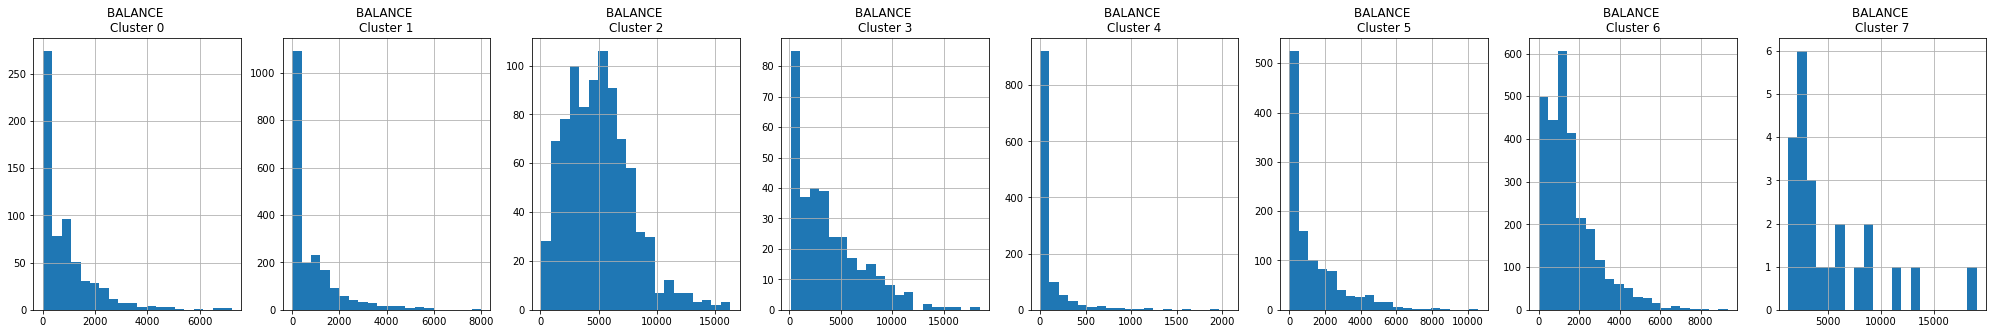

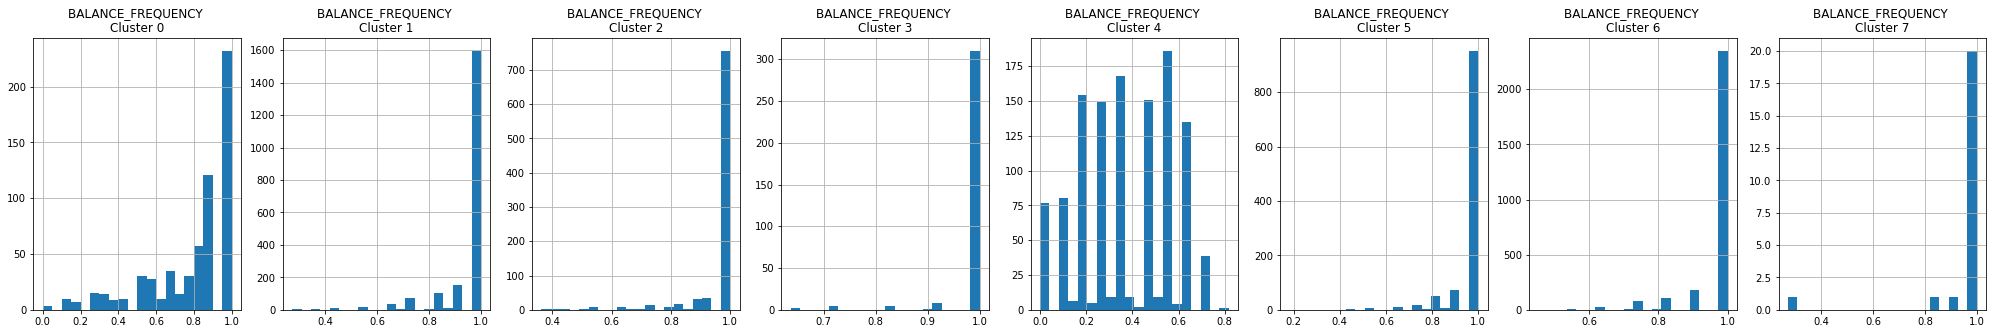

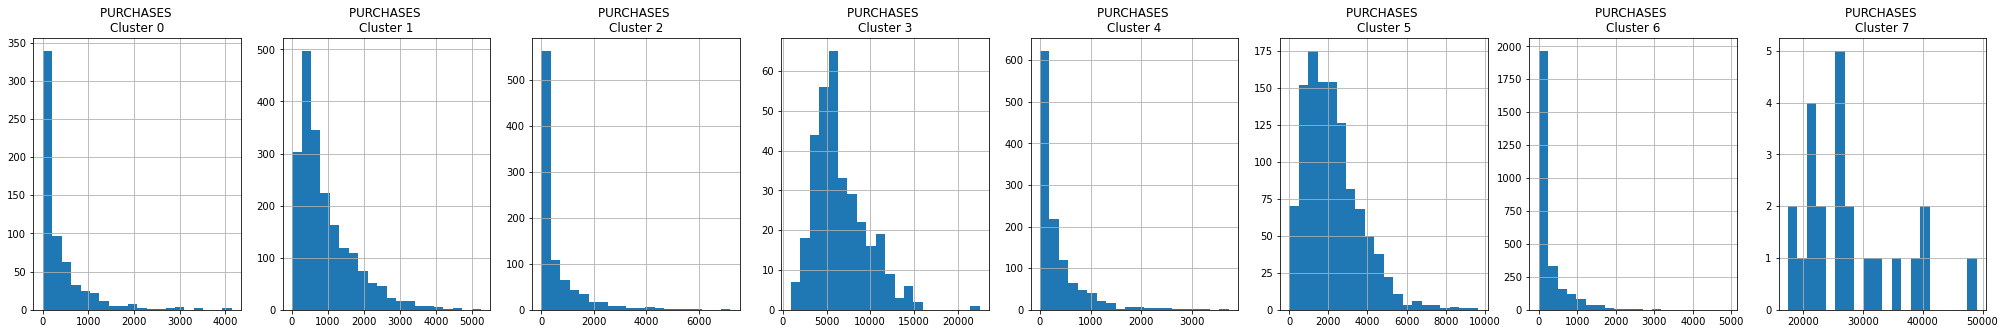

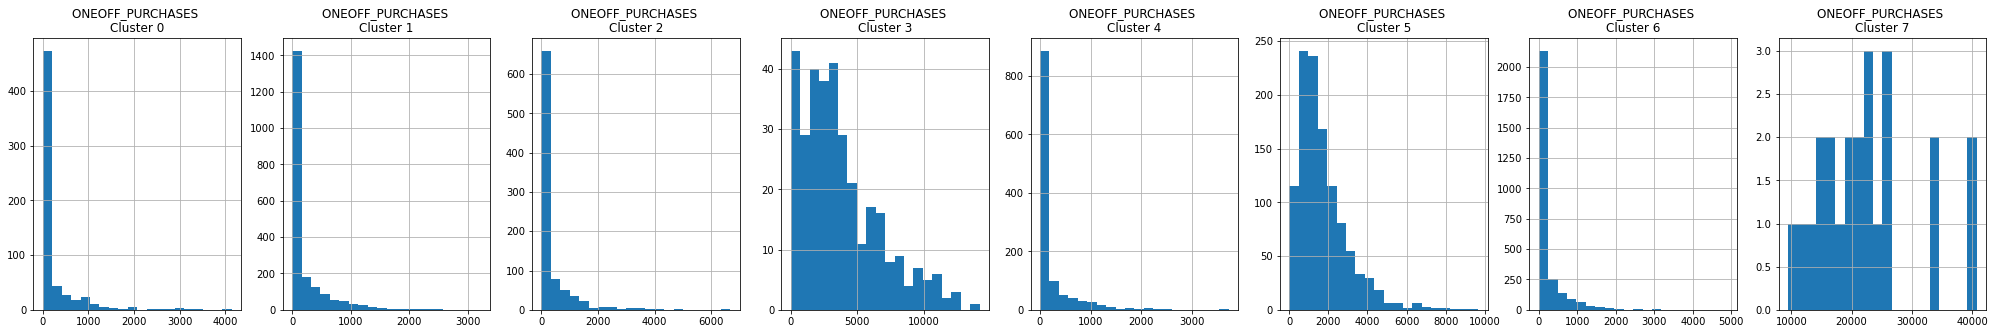

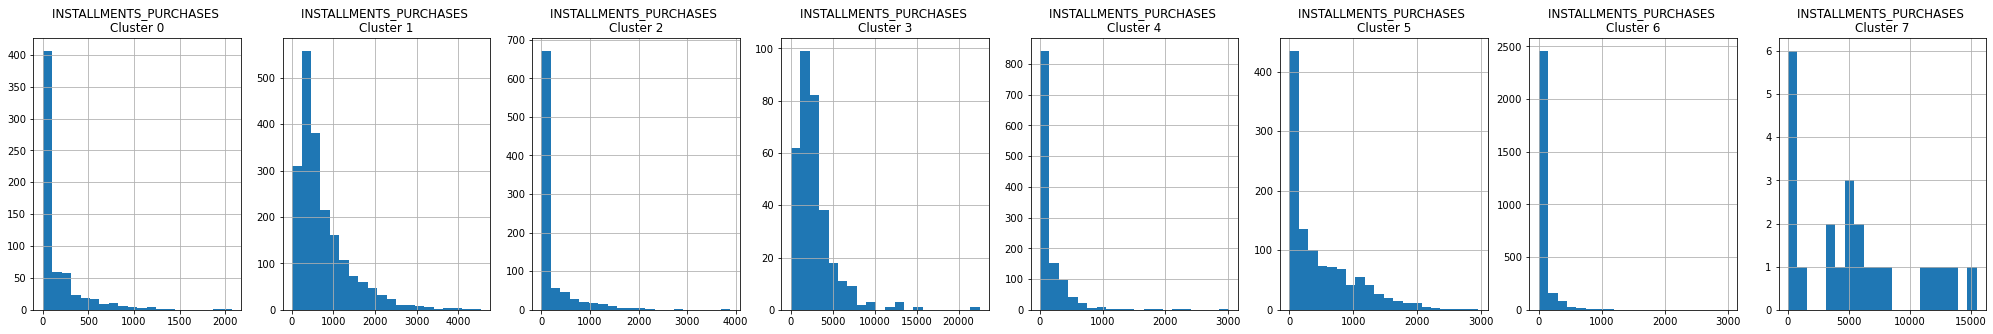

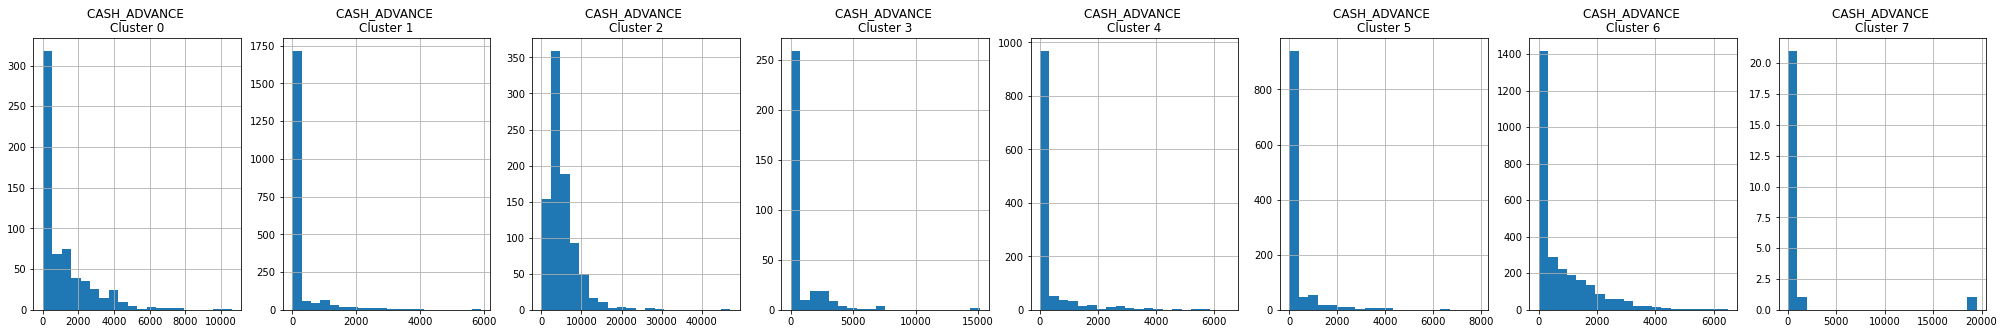

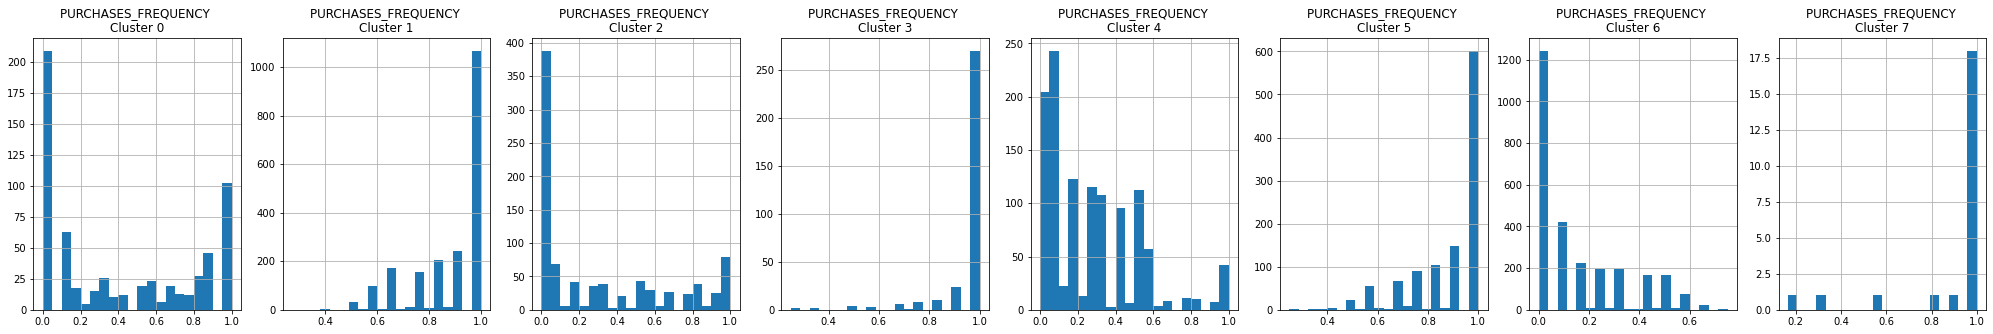

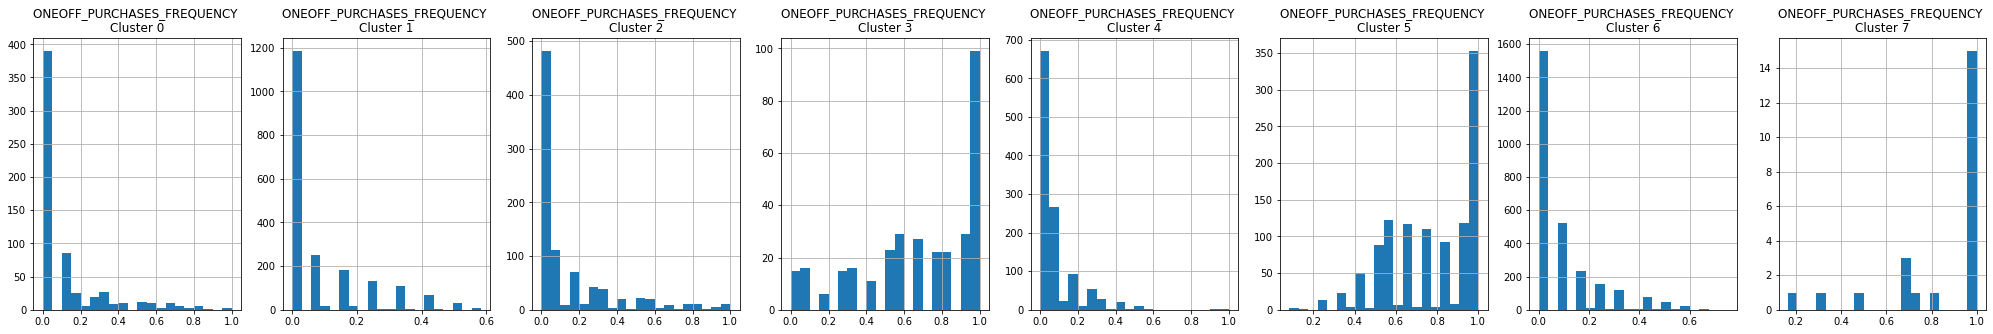

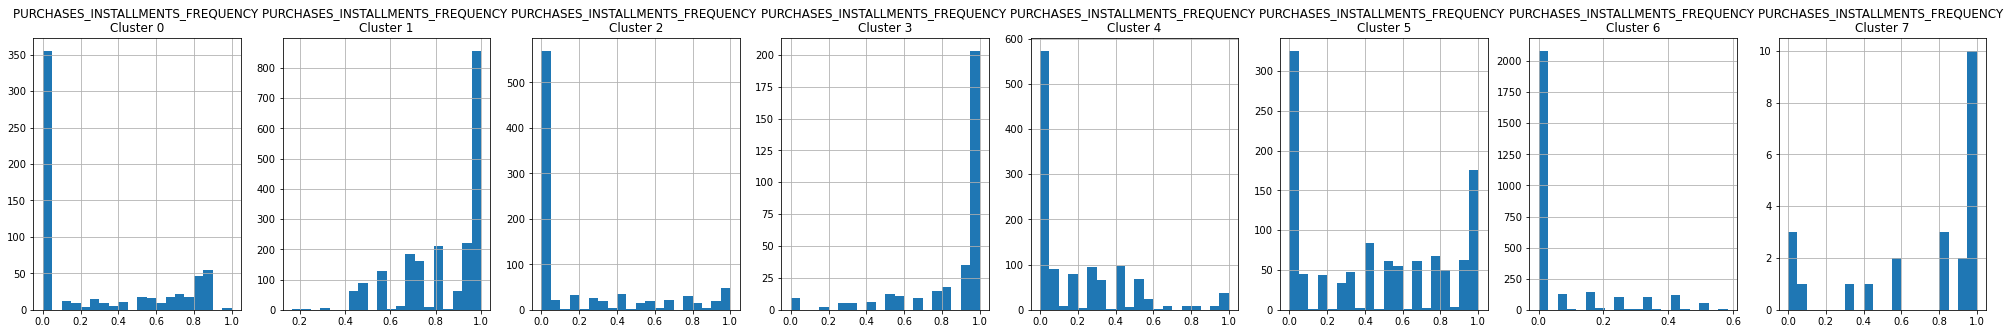

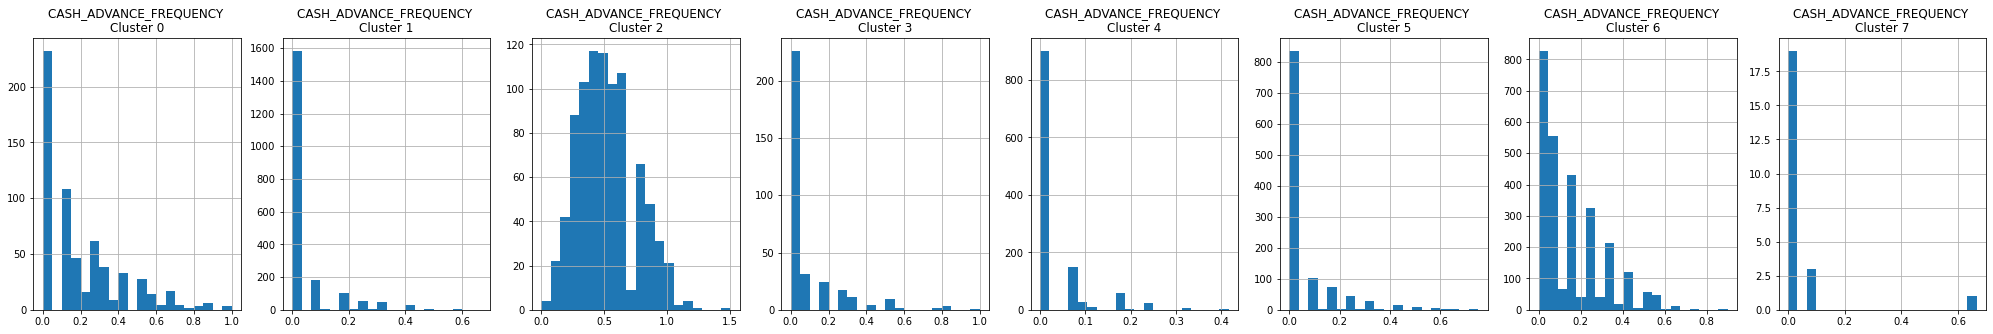

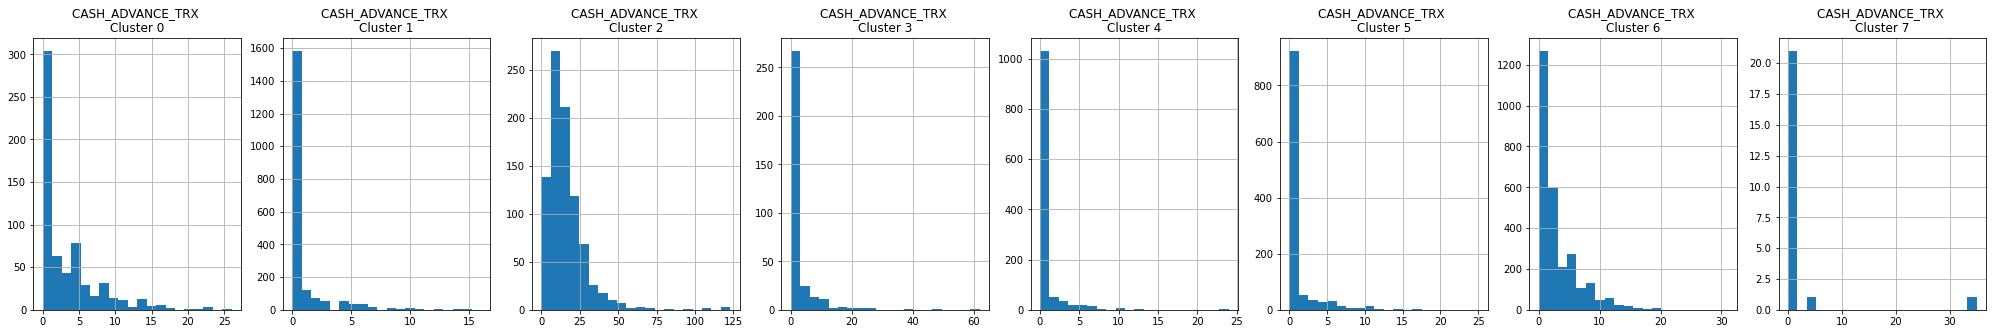

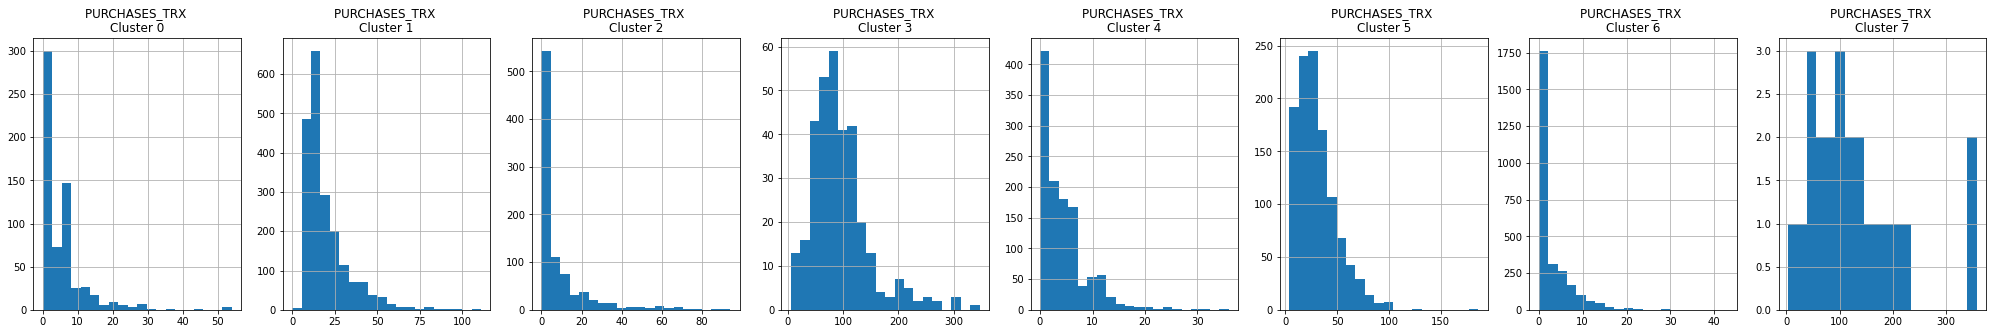

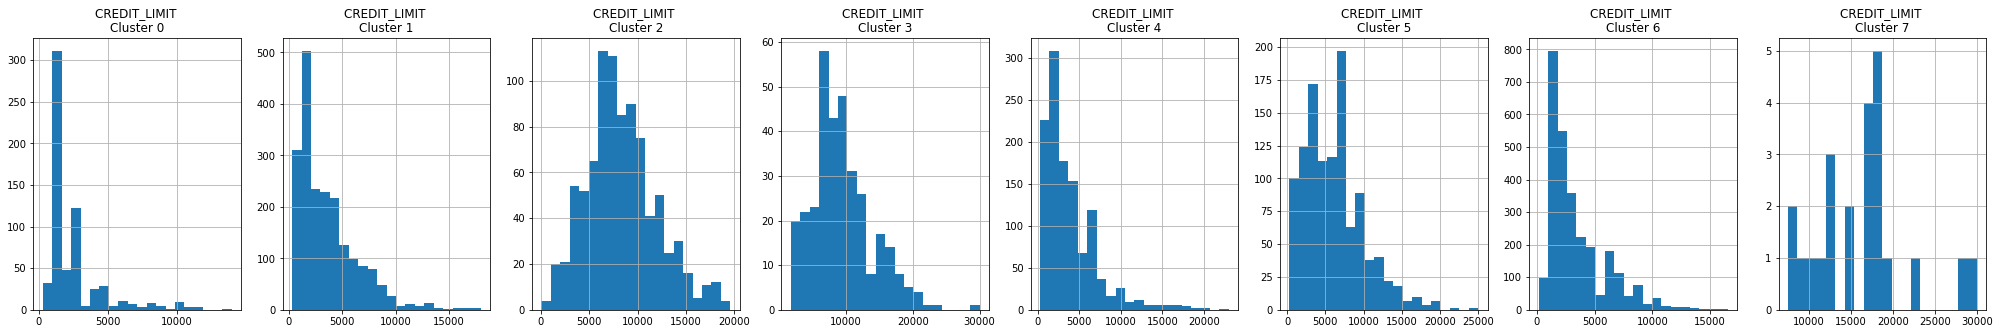

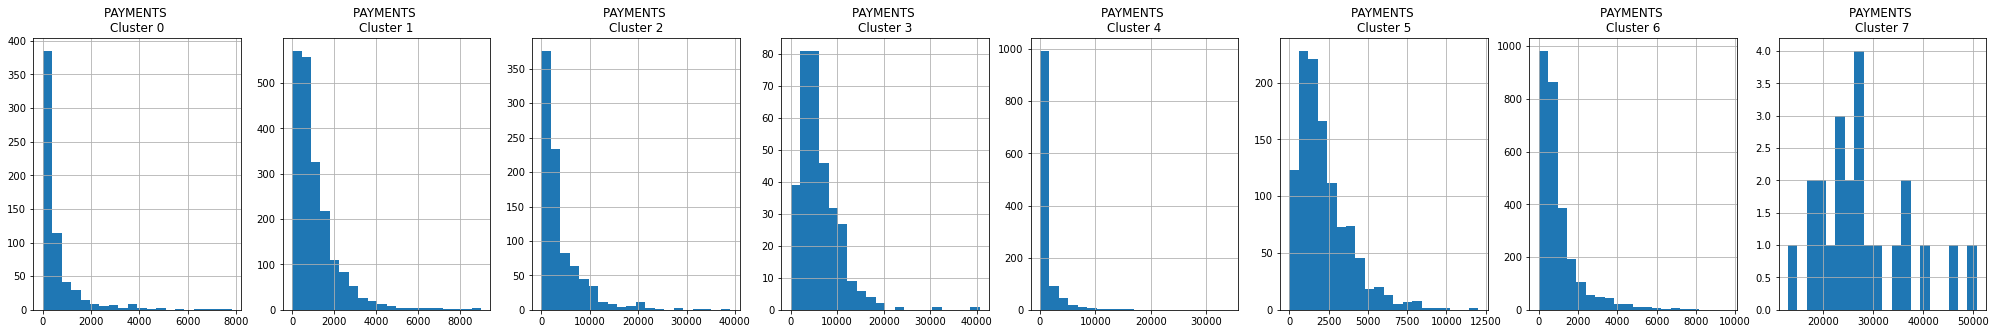

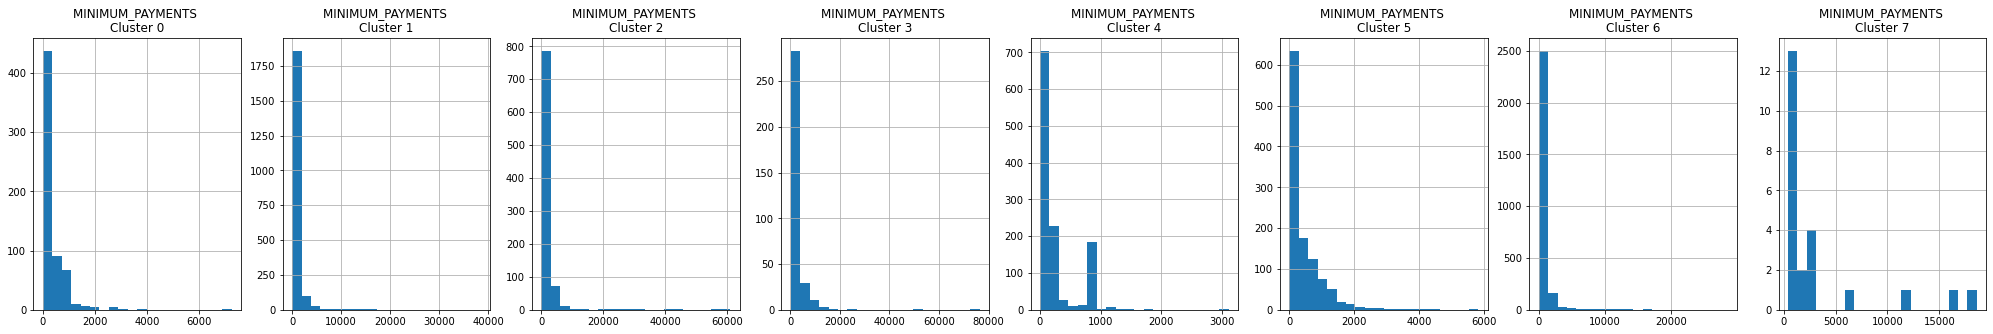

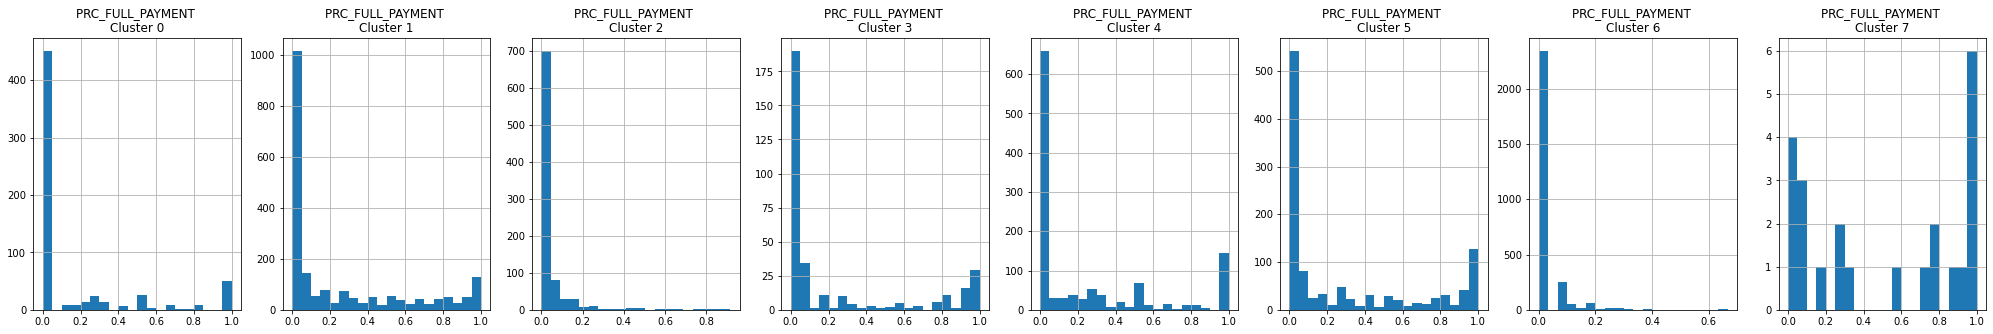

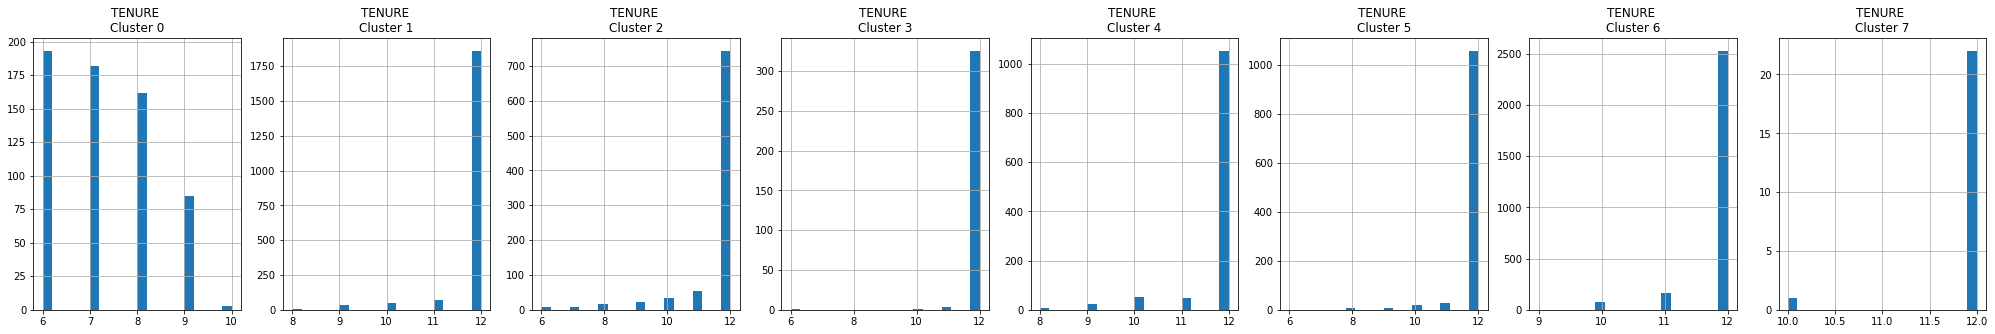

In [41]:
for i in credicard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = credicard_df_cluster[credicard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [42]:
credit_ordered = credicard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,0
8195,737.775044,1.000000,107.94,107.94,0.00,2723.362442,0.166667,0.166667,0.000000,0.500000,14,1,1500.0,1484.746502,184.381222,0.2,6,0
2487,5880.218671,0.666667,0.00,0.00,0.00,10590.411130,0.000000,0.000000,0.000000,0.166667,1,0,11500.0,1828.239171,1952.041626,0.0,6,0
2491,1343.165153,1.000000,291.62,0.00,291.62,1461.717523,1.000000,0.000000,0.857143,0.142857,4,7,1500.0,276.342352,849.320880,0.0,7,0
8188,772.647723,0.875000,0.00,0.00,0.00,970.371120,0.000000,0.000000,0.000000,0.125000,1,0,2500.0,125.862157,209.002905,0.0,8,0


In [43]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4220,1268.809031,0.272727,17945.00,17945.00,0.00,0.0,0.166667,0.166667,0.000000,0.0,0,3,18000.0,50721.48336,1149.747342,0.000000,12,7
587,2492.726282,1.000000,27957.68,23032.97,4924.71,0.0,1.000000,1.000000,0.916667,0.0,0,70,9000.0,27255.00752,537.372671,1.000000,12,7
1447,8151.985277,1.000000,25615.07,25122.77,492.30,0.0,1.000000,1.000000,0.583333,0.0,0,56,17000.0,17575.20083,2465.465414,0.166667,12,7
3652,8700.079439,1.000000,20421.59,16864.56,3557.03,0.0,1.000000,1.000000,1.000000,0.0,0,204,17000.0,13002.30393,2746.592199,0.083333,12,7
941,2072.457624,1.000000,17409.21,11263.17,6146.04,0.0,1.000000,1.000000,1.000000,0.0,0,175,19500.0,19517.16160,517.324081,0.333333,12,7


Aplicação de PCA (principal component analysis) e visualização dos resultados

In [44]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(credicard_df_scaled)
principal_comp

array([[-1.68222322, -1.07646327],
       [-1.13830538,  2.50643698],
       [ 0.96969129, -0.38347162],
       ...,
       [-0.92620431, -1.81079198],
       [-2.33655331, -0.65798303],
       [-0.55641667, -0.40044389]])

In [45]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682223,-1.076463
1,-1.138305,2.506437
2,0.969691,-0.383472
3,-0.873629,0.043160
4,-1.599437,-0.688592


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

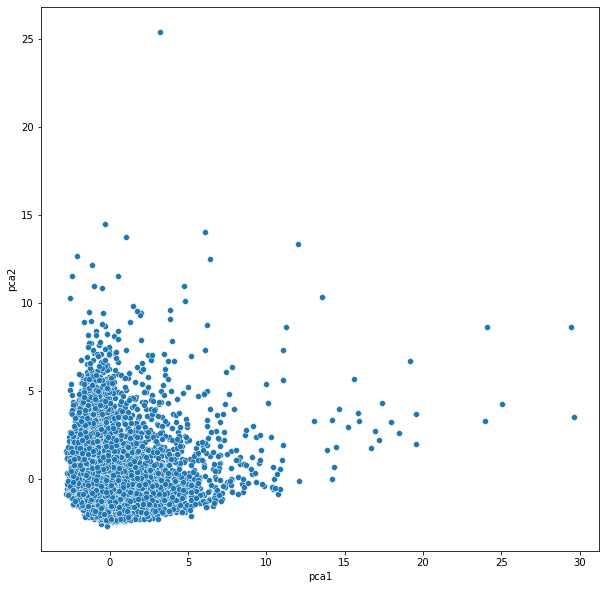

In [58]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

# Aplicação de autoencoders

In [61]:
credicard_df_scaled.shape

(8950, 17)

In [62]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [63]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [64]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [65]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [77]:
encoder = Model(input_df, encoded)

In [66]:
autoencoder.fit(credicard_df_scaled, credicard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 8s 27ms/step - loss: 0.2025
Epoch 2/50
280/280 [==============================] - 9s 31ms/step - loss: 0.1008
Epoch 3/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0638
Epoch 4/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0494
Epoch 5/50
280/280 [==============================] - 7s 27ms/step - loss: 0.0429
Epoch 6/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0372
Epoch 7/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0334
Epoch 8/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0360
Epoch 9/50
280/280 [==============================] - 7s 27ms/step - loss: 0.0510
Epoch 10/50
280/280 [==============================] - 7s 26ms/step - loss: 0.0532
Epoch 11/50
280/280 [==============================] - 8s 27ms/step - loss: 0.0340
Epoch 12/50
280/280 [==============================] - 7s 27ms/step - loss: 0.0282
Epoch 13/50
2

In [81]:
credicard_df_scaled.shape

(8950, 17)

In [82]:
compact = encoder.predict(credicard_df_scaled)

In [83]:
credicard_df_scaled[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [84]:
compact[0]

array([0.77818894, 1.2281075 , 0.24365684, 0.        , 0.1327128 ,
       0.        , 0.43975586, 0.39711916, 1.398442  , 0.        ],
      dtype=float32)

In [85]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

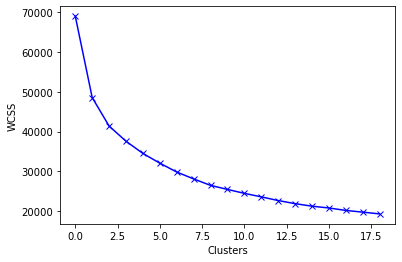

In [86]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

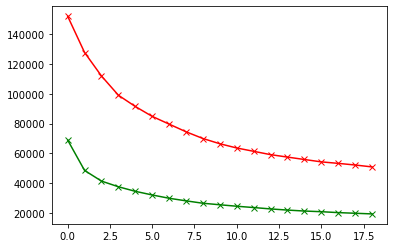

In [87]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

In [88]:
labels = kmeans.labels_
labels, labels.shape

(array([ 3,  7,  3, ..., 15,  6,  0]), (8950,))

In [89]:
df_cluster_at = pd.concat([credicard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,14
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [90]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.083805,-0.291262
1,1.053507,-0.799783
2,-1.408483,0.325976
3,0.746058,-0.266883
4,-1.526016,-0.148823


In [91]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.083805,-0.291262,3
1,1.053507,-0.799783,7
2,-1.408483,0.325976,3
3,0.746058,-0.266883,14
4,-1.526016,-0.148823,3


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

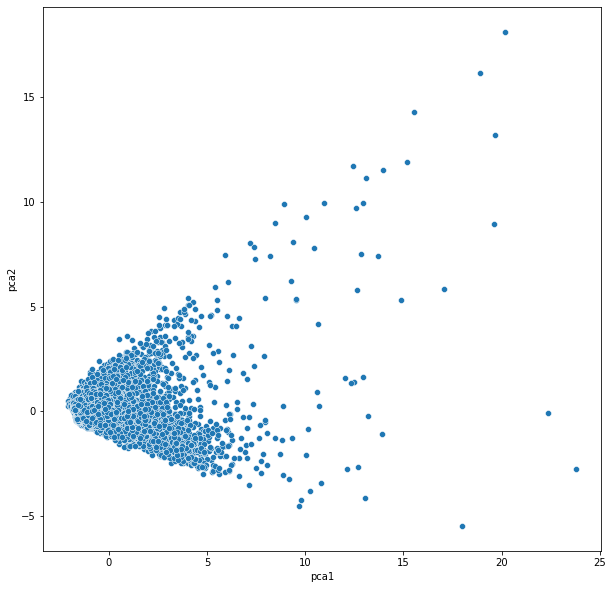

In [94]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2',  data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [95]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,0
7548,68.105410,0.250000,0.00,0.00,0.00,462.554056,0.000000,0.000000,0.000,0.250000,6,0,500.0,0.000000,864.206542,0.0,8,0
7489,205.127197,0.571429,1222.98,1222.98,0.00,0.000000,0.428571,0.428571,0.000,0.000000,0,5,3000.0,1144.834860,121.334941,0.0,7,0
7461,3278.506664,0.625000,472.51,216.49,256.02,6548.948805,0.500000,0.125000,0.375,0.250000,8,9,7000.0,1304.846205,1296.586971,0.0,8,0
3683,502.399014,0.428571,0.00,0.00,0.00,1392.472408,0.000000,0.000000,0.000,0.285714,4,0,1500.0,0.000000,864.206542,0.0,7,0


In [96]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2855,9.730297,0.636364,99.24,0.00,99.24,0.000000,0.583333,0.000000,0.583333,0.000000,0,8,1000.0,195.347822,104.212617,0.142857,12,18
1642,86.905609,1.000000,1106.40,0.00,1106.40,440.972634,1.000000,0.000000,1.000000,0.083333,1,12,2500.0,1538.001397,186.726083,1.000000,12,18
7062,1212.237847,1.000000,400.00,0.00,400.00,1141.617933,1.000000,0.000000,0.900000,0.200000,3,10,1200.0,424.376685,1480.270923,0.000000,10,18
8219,20.595501,0.545455,289.78,0.00,289.78,0.000000,0.416667,0.000000,0.416667,0.000000,0,5,2700.0,342.440014,82.359493,0.363636,12,18
3185,1076.586375,1.000000,2204.54,877.89,1326.65,0.000000,1.000000,0.166667,1.000000,0.000000,0,50,1000.0,2514.502136,2301.241067,0.000000,12,18


In [97]:
df_cluster_ordered.to_excel('cluster_ordereded.xls')

<ipython-input-97-0bdd89c631ee>:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_cluster_ordered.to_excel('cluster_ordereded.xls')
